In [31]:
import pandas as pd
from datasets_classes import QM9Dataset
from ase.units import eV, Hartree

import seaborn as sns
import matplotlib.pyplot as plt

## exported from loss/valid panel of wandb
df = pd.read_csv("../data/qm9_valid_loss.csv",index_col=0)
dataframe = {"target":[], "vanilla":[], "vanilla_hydrogen":[], "weighted_hydrogen":[]}

#sota={'mu':0.0272,
# 'alpha':0.0469,
# 'homo':24.78,
# 'lumo':19.71,
# 'gap':33.31,
# 'r2':0.072,
# 'zpve': 1.18,
# 'cv': 0.0233,
# 'u0': 5.92,
# 'u298': 6.85,
# 'h298': 6.08,
# 'g298': 7.61}



""" - "homo" - Highest occupied molecular orbital energy (unit: Hartree)
    - "lumo" - Lowest unoccupied molecular orbital energy (unit: Hartree)
    - "gap" - Gap between HOMO and LUMO (unit: Hartree)
    - "zpve" - Zero point vibrational energy (unit: Hartree)
    - "u0" - Internal energy at 0K (unit: Hartree)
    - "u298" - Internal energy at 298.15K (unit: Hartree)
    - "h298" - Enthalpy at 298.15K (unit: Hartree)
    - "g298" - Free energy at 298.15K (unit: Hartree)
"""
    
## we need to convert all Hartree units to meV to compare to SOTA results

conversion = (1e6 * eV)/Hartree

conversions={'mu':1,
 'alpha':1,
 'homo':conversion,
 'lumo':conversion,
 'gap':conversion,
 'r2':1,
 'zpve': conversion,
 'cv': 1,
 'u0': conversion,
 'u298': conversion,
 'h298': conversion,
 'g298': conversion}

sota={'mu':0.0272,
 'alpha':0.0469,
 'homo':24.78,
 'lumo':19.71,
 'gap':33.31,
 'r2':0.072,
 'zpve': 1.18,
 'cv': 0.0233,
 'u0': 5.92,
 'u298': 6.85,
 'h298': 6.08,
 'g298': 7.61}


sota= pd.Series(sota)


for target in QM9Dataset.target_names:
    s = df.iloc[:, df.columns.str.contains(target) & df.columns.str.contains("MIN")].min()
    s =  s* conversions[target]

    #weighted_hyd_idx= list(s.index).index(f'target_{target}_hydrogen_weighted - loss/valid__MIN')
    #weighted_hyd_idx= list(s.index).index(f'target_{target}_hydrogen_weighted - loss/valid__MIN')

    dataframe['target'].append(target)
    dataframe['vanilla'].append(s[2])
    dataframe['vanilla_hydrogen'].append(s[1])
    dataframe['weighted_hydrogen'].append(s[0])


res = pd.DataFrame(dataframe)
res.set_index('target', inplace=True)

res['sota'] = sota

res

,vanilla,vanilla_hydrogen,weighted_hydrogen,sota
target,,,,
mu,0.540179,0.131841,0.030802,0.0272
alpha,1.243490,0.102108,0.274447,0.0469
homo,824.929061,474.139621,119.692907,24.7800
lumo,1199.206930,664.093841,674.333965,19.7100
gap,1285.580389,257.235511,127.487014,33.3100
r2,25.904984,1.521795,1.049091,0.0720
zpve,401.132784,21.855712,93.831540,1.1800
cv,5.181659,1.797555,0.707774,0.0233
u0,172037.588287,61164.283674,125079.003074,5.9200


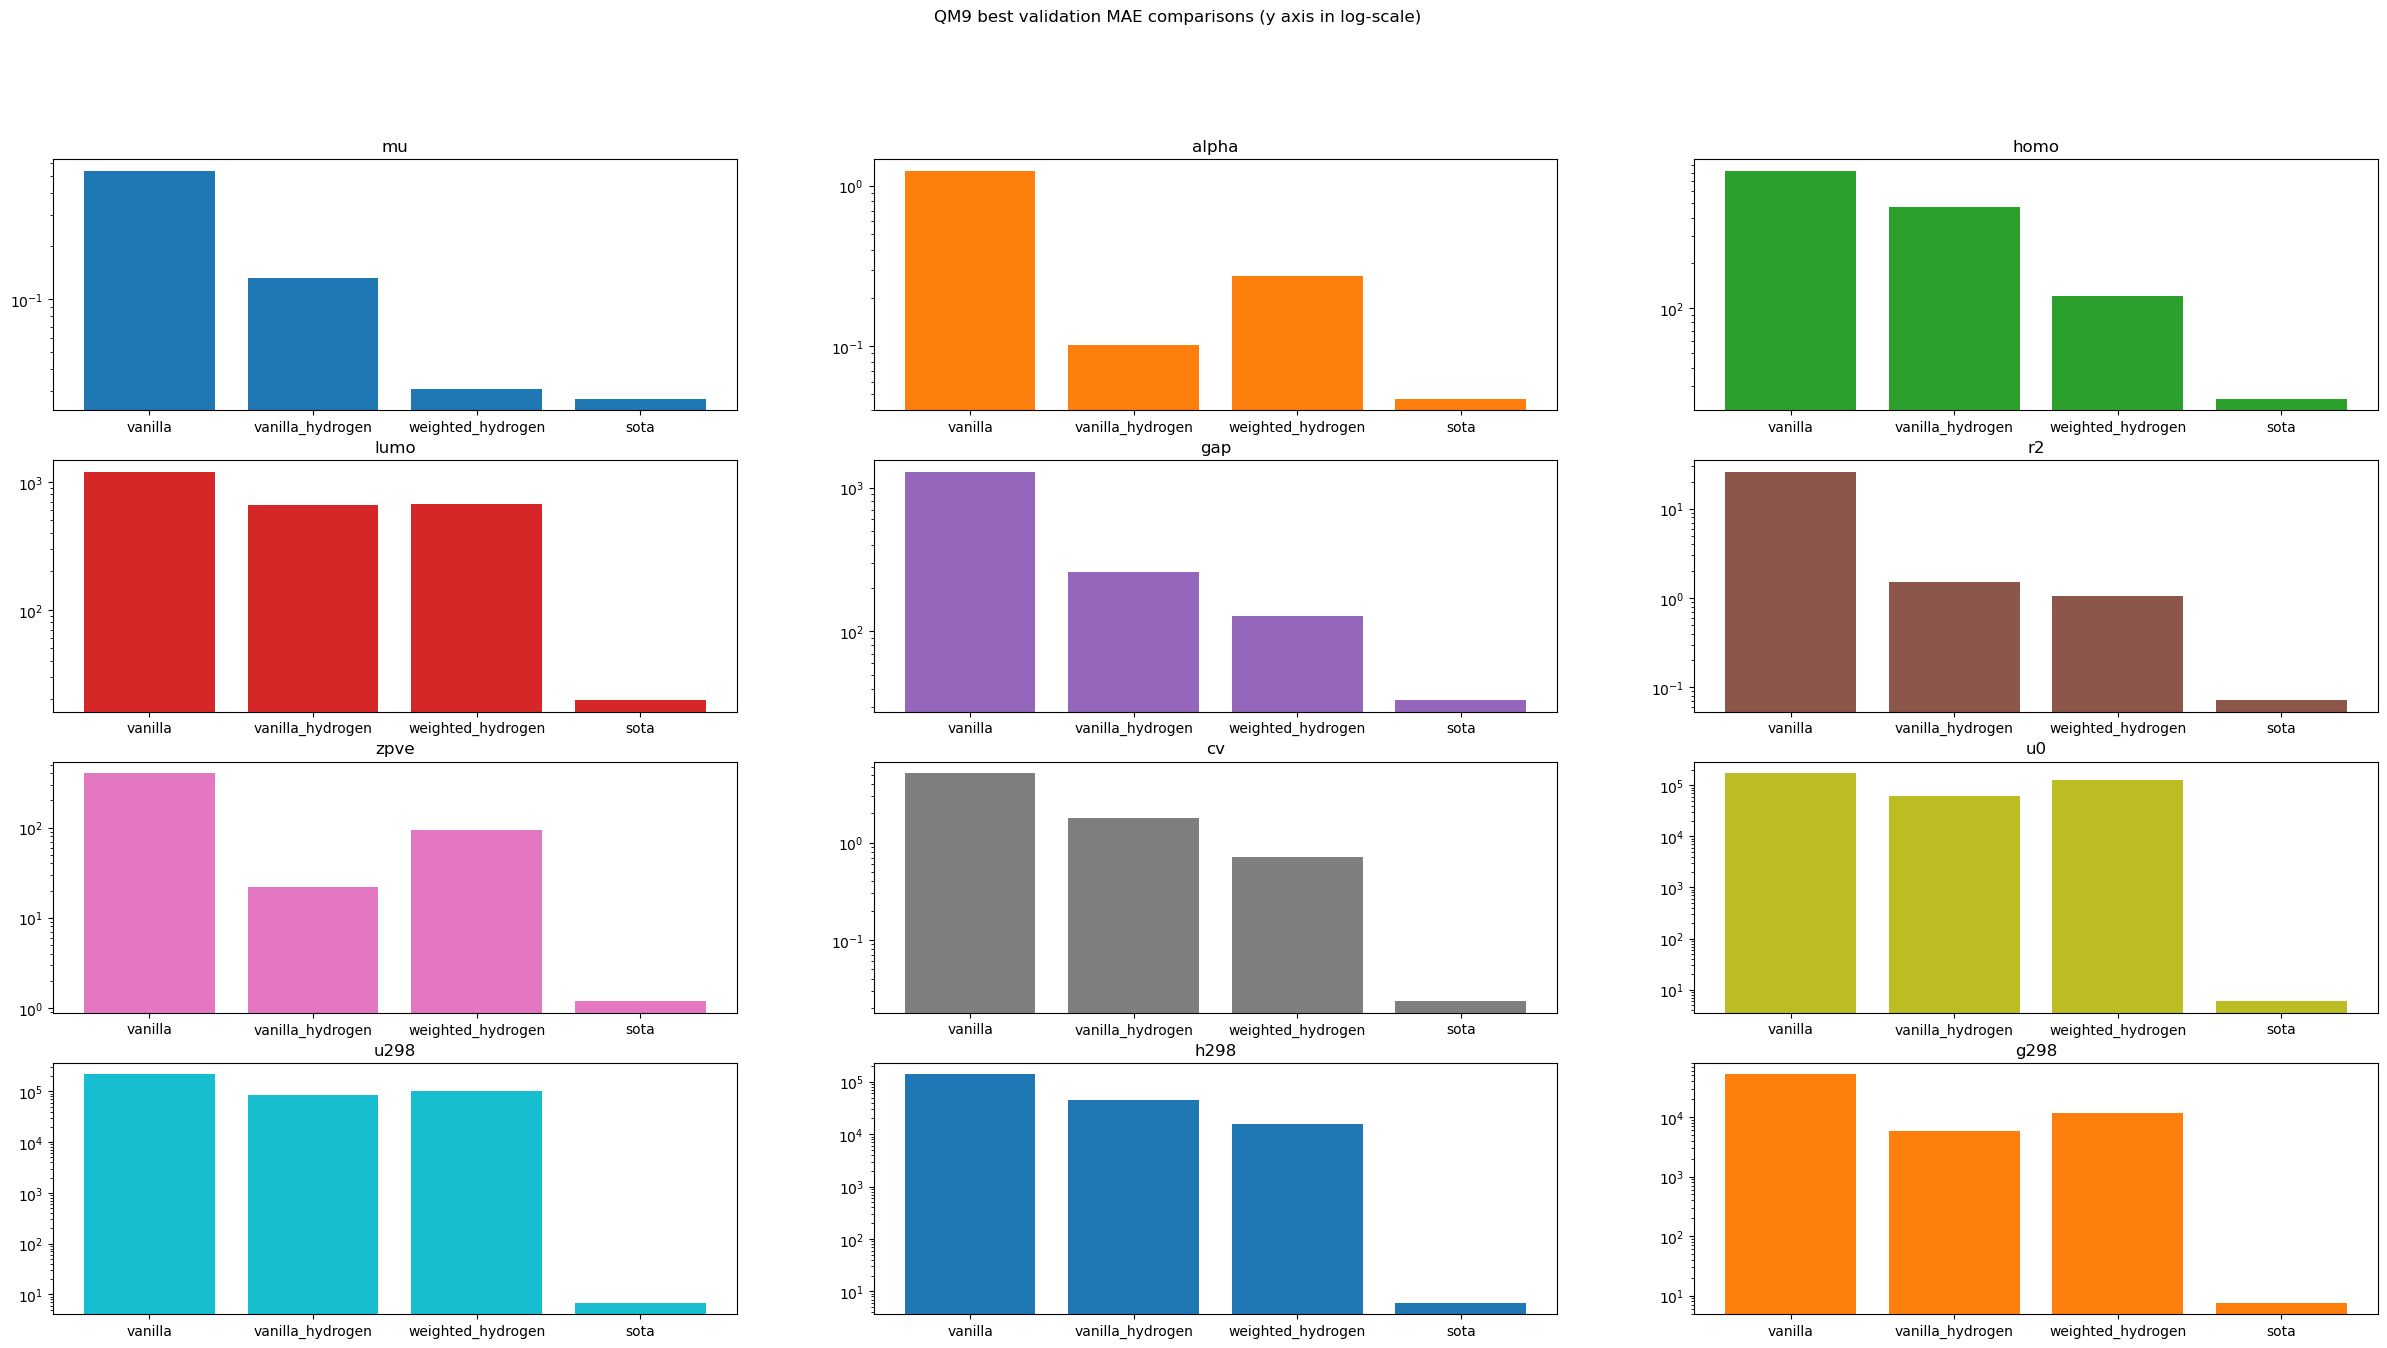

In [55]:
colors = plt.rcParams["axes.prop_cycle"]()

f,a = plt.subplots(4,3, figsize=(30,15))
plt.suptitle("QM9 best validation MAE comparisons (y axis in log-scale)")

for target, ax in zip(QM9Dataset.target_names, a.flatten()):
    c = next(colors)["color"]
    ax.bar(height= res.loc[target], x=res.columns, color=c)
    ax.set_yscale('log')
    ax.set_title(target)
    
    
plt.savefig("../results/qm9_mae_loss_comparisons.png",dpi=200)